**/ Regression**

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("C:\\Users\\123\\Desktop\\python project for data analitycs\\Data\\Student_Performance.csv")

In [15]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(127)

In [18]:
print("Size of data : ",data.size)
print("Shape of data : ", data.shape)

Size of data :  60000
Shape of data :  (10000, 6)


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
print("Size of data : ",data.size)
print("Shape of data : ", data.shape)

Size of data :  59238
Shape of data :  (9873, 6)


In [22]:
le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])

In [23]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [28]:
x = data.iloc[:,:-1]
y = data["Performance Index"]

In [29]:
x.shape, y.shape

((9873, 5), (9873,))

In [31]:
x.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

In [35]:
# Check for missing values
print("Missing values:\n", x.isnull().sum())

# Display basic info
print("\nDataset Info:")
print(x.info())
print("\nFirst 5 rows of features:\n", x.head())

Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int64
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
dtypes: int64(5)
memory usage: 462.8 KB
None

First 5 rows of features:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1       

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7898, 5), (1975, 5), (7898,), (1975,))

In [47]:
# prepering model

dt_regressor = DecisionTreeRegressor(max_depth=8, min_samples_split=13, min_samplesre_leaf=7, random_state=42)

In [48]:
dt_regressor.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",13
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",7
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [49]:
y_pred = dt_regressor.predict(x_test)

In [50]:
pd.DataFrame({"y_test":y_test, "y_pred":y_pred})

,y_test,y_pred
6099,47.0,47.095238
106,76.0,82.225000
9265,62.0,60.085714
4707,23.0,22.608696
2155,76.0,73.678571
...,...,...
8732,19.0,15.222222
3112,39.0,37.384615
5297,77.0,76.892857
6116,88.0,85.980769


In [51]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [52]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 6.5833
R-squared Score: 0.9823


In [53]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 5, 2, 10, 13]
}

In [55]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candida

In [56]:
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [58]:
y_pred_best = best_model.predict(x_test)
print(f"Best Model MSE: {mean_squared_error(y_test, y_pred_best):.4f}")
print(f"Best Model R²: {r2_score(y_test, y_pred_best):.4f}")

Best Model MSE: 5.9331
Best Model R²: 0.9841


In [59]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                             Feature  Importance
1                   Previous Scores    0.853507
0                     Hours Studied    0.143672
3                       Sleep Hours    0.001679
4  Sample Question Papers Practiced    0.000910
2        Extracurricular Activities    0.000232


In [60]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                             Feature  Importance
1                   Previous Scores    0.855172
0                     Hours Studied    0.143881
3                       Sleep Hours    0.000699
4  Sample Question Papers Practiced    0.000231
2        Extracurricular Activities    0.000017


In [61]:
# making Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5, 0.9444444444444444, 'x[1] <= 69.5\nsquared_error = 368.051\nsamples = 7898\nvalue = 55.096'),
 Text(0.25, 0.8333333333333334, 'x[1] <= 53.5\nsquared_error = 134.199\nsamples = 4005\nvalue = 39.997'),
 Text(0.375, 0.8888888888888888, 'True  '),
 Text(0.125, 0.7222222222222222, 'x[0] <= 4.5\nsquared_error = 79.336\nsamples = 1830\nvalue = 31.852'),
 Text(0.0625, 0.6111111111111112, 'x[1] <= 46.5\nsquared_error = 32.922\nsamples = 820\nvalue = 24.579'),
 Text(0.03125, 0.5, 'x[0] <= 2.5\nsquared_error = 19.538\nsamples = 406\nvalue = 20.833'),
 Text(0.015625, 0.3888888888888889, 'x[1] <= 42.5\nsquared_error = 11.275\nsamples = 209\nvalue = 18.086'),
 Text(0.0078125, 0.2777777777777778, 'x[0] <= 1.5\nsquared_error = 7.152\nsamples = 90\nvalue = 15.878'),
 Text(0.00390625, 0.16666666666666666, 'x[1] <= 40.5\nsquared_error = 5.175\nsamples = 49\nvalue = 14.735'),
 Text(0.001953125, 0.05555555555555555, 'squared_error = 3.139\nsamples = 18\nvalue = 13.5'),
 Text(0.005859375, 0.05555

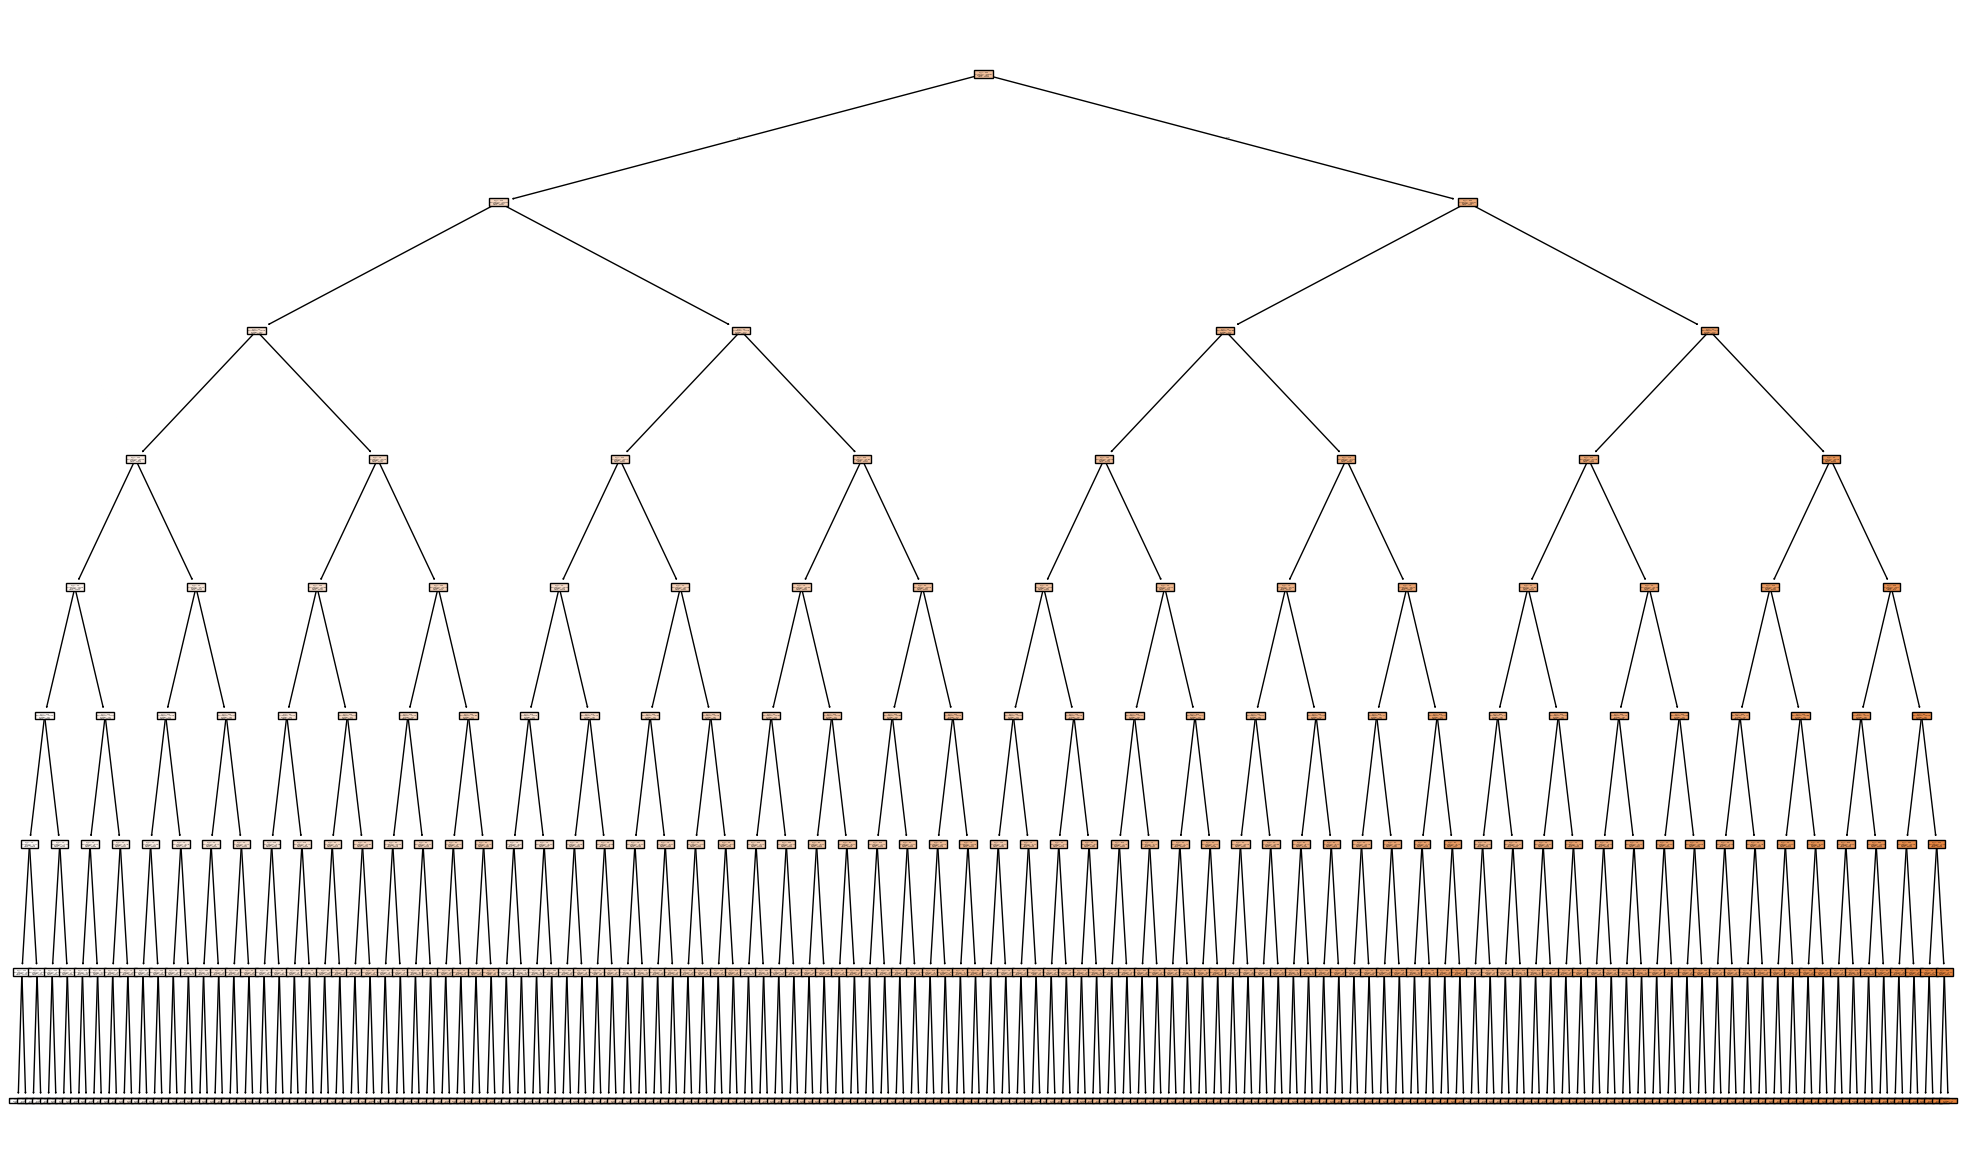

In [62]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt_regressor, filled=True)

[Text(0.5, 0.9285714285714286, 'x[1] <= 69.5\nsquared_error = 368.051\nsamples = 7898\nvalue = 55.096'),
 Text(0.25, 0.7857142857142857, 'x[1] <= 53.5\nsquared_error = 134.199\nsamples = 4005\nvalue = 39.997'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[0] <= 4.5\nsquared_error = 79.336\nsamples = 1830\nvalue = 31.852'),
 Text(0.0625, 0.5, 'x[1] <= 46.5\nsquared_error = 32.922\nsamples = 820\nvalue = 24.579'),
 Text(0.03125, 0.35714285714285715, 'x[0] <= 2.5\nsquared_error = 19.538\nsamples = 406\nvalue = 20.833'),
 Text(0.015625, 0.21428571428571427, 'x[1] <= 42.5\nsquared_error = 11.275\nsamples = 209\nvalue = 18.086'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'x[1] <= 42.5\nsquared_error = 11.814\nsamples = 197\nvalue = 23.746'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),


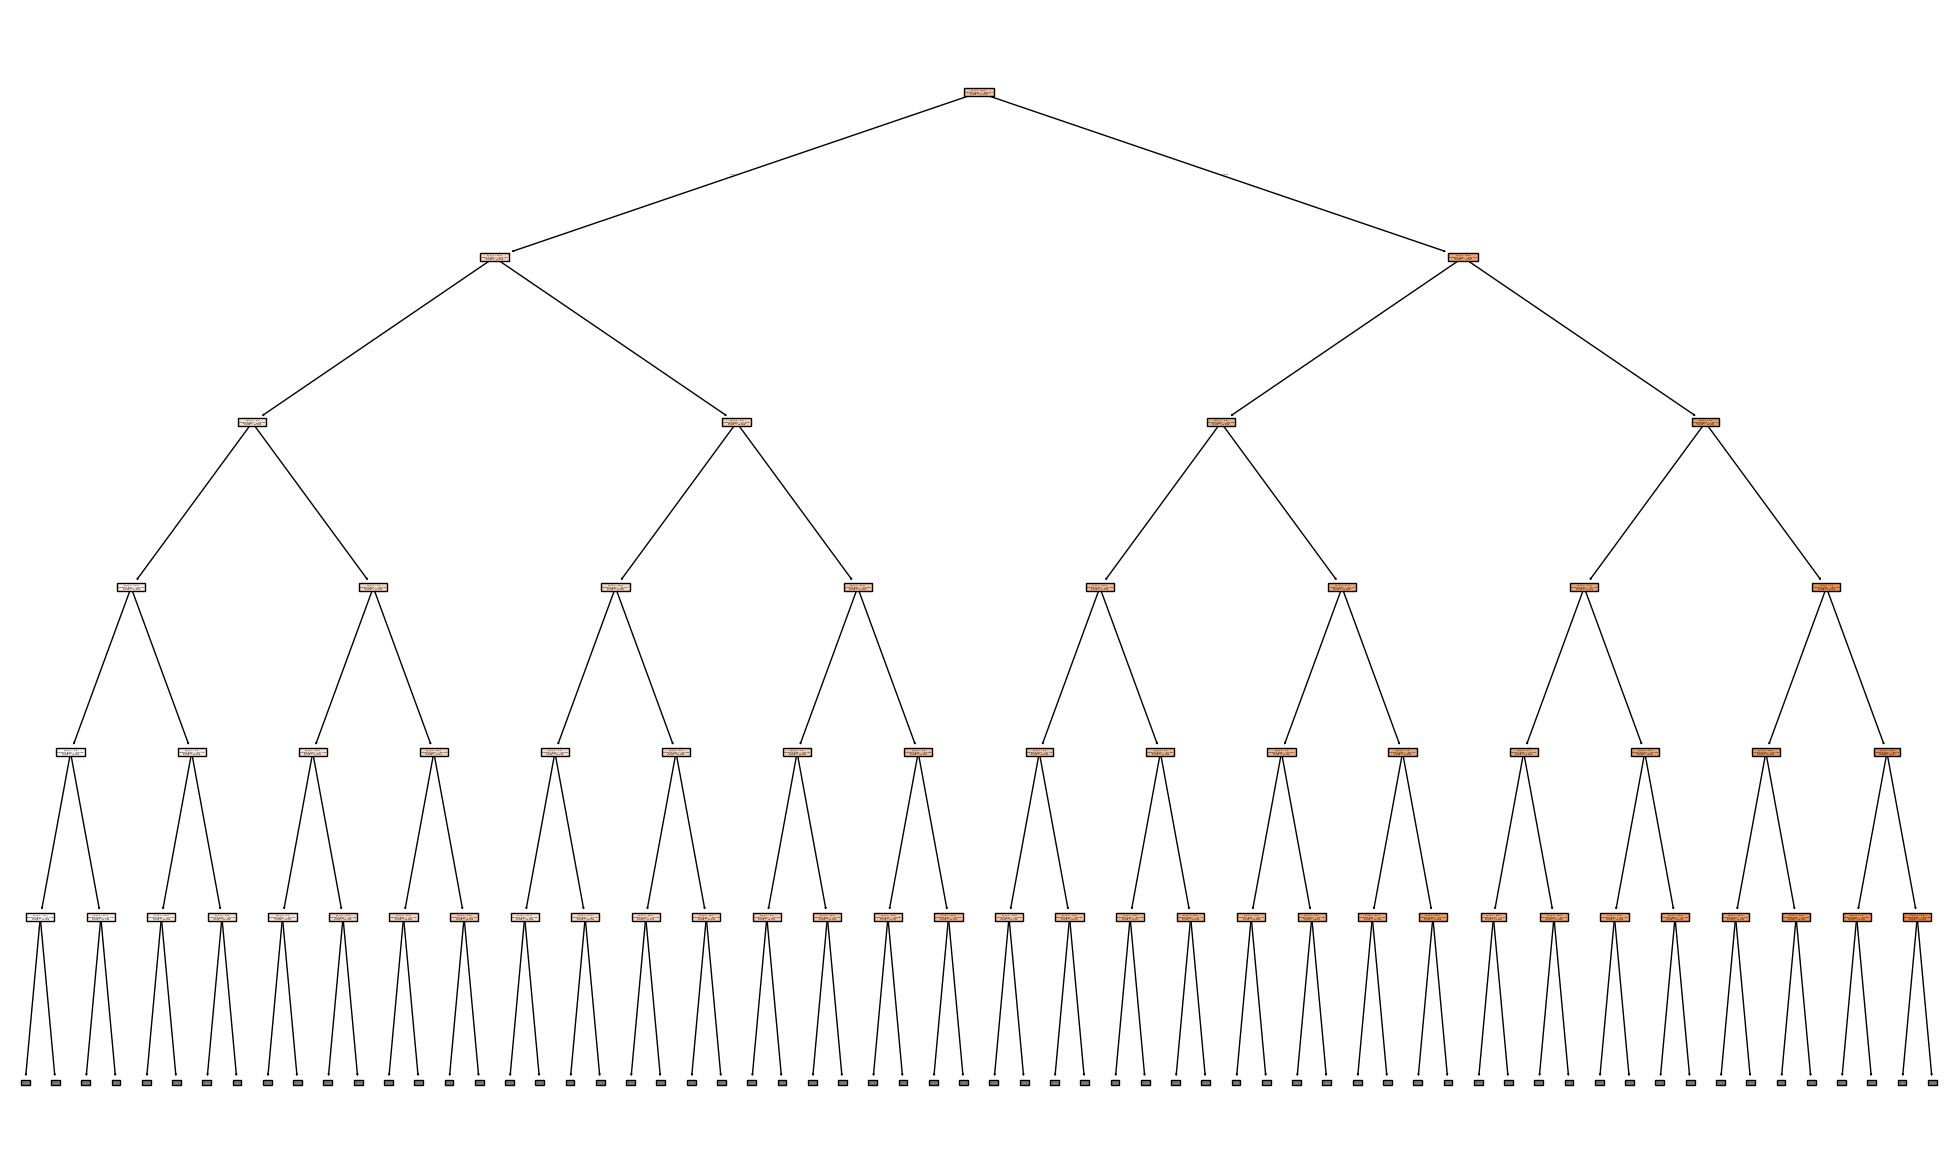

In [63]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt_regressor, max_depth=5, filled= True)

[Text(0.5, 0.9285714285714286, 'x[1] <= 69.5\nsquared_error = 368.051\nsamples = 7898\nvalue = 55.096'),
 Text(0.25, 0.7857142857142857, 'x[1] <= 53.5\nsquared_error = 134.199\nsamples = 4005\nvalue = 39.997'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[0] <= 4.5\nsquared_error = 79.336\nsamples = 1830\nvalue = 31.852'),
 Text(0.0625, 0.5, 'x[1] <= 46.5\nsquared_error = 32.922\nsamples = 820\nvalue = 24.579'),
 Text(0.03125, 0.35714285714285715, 'x[0] <= 2.5\nsquared_error = 19.538\nsamples = 406\nvalue = 20.833'),
 Text(0.015625, 0.21428571428571427, 'x[1] <= 42.5\nsquared_error = 11.275\nsamples = 209\nvalue = 18.086'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'x[1] <= 42.5\nsquared_error = 11.814\nsamples = 197\nvalue = 23.746'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),


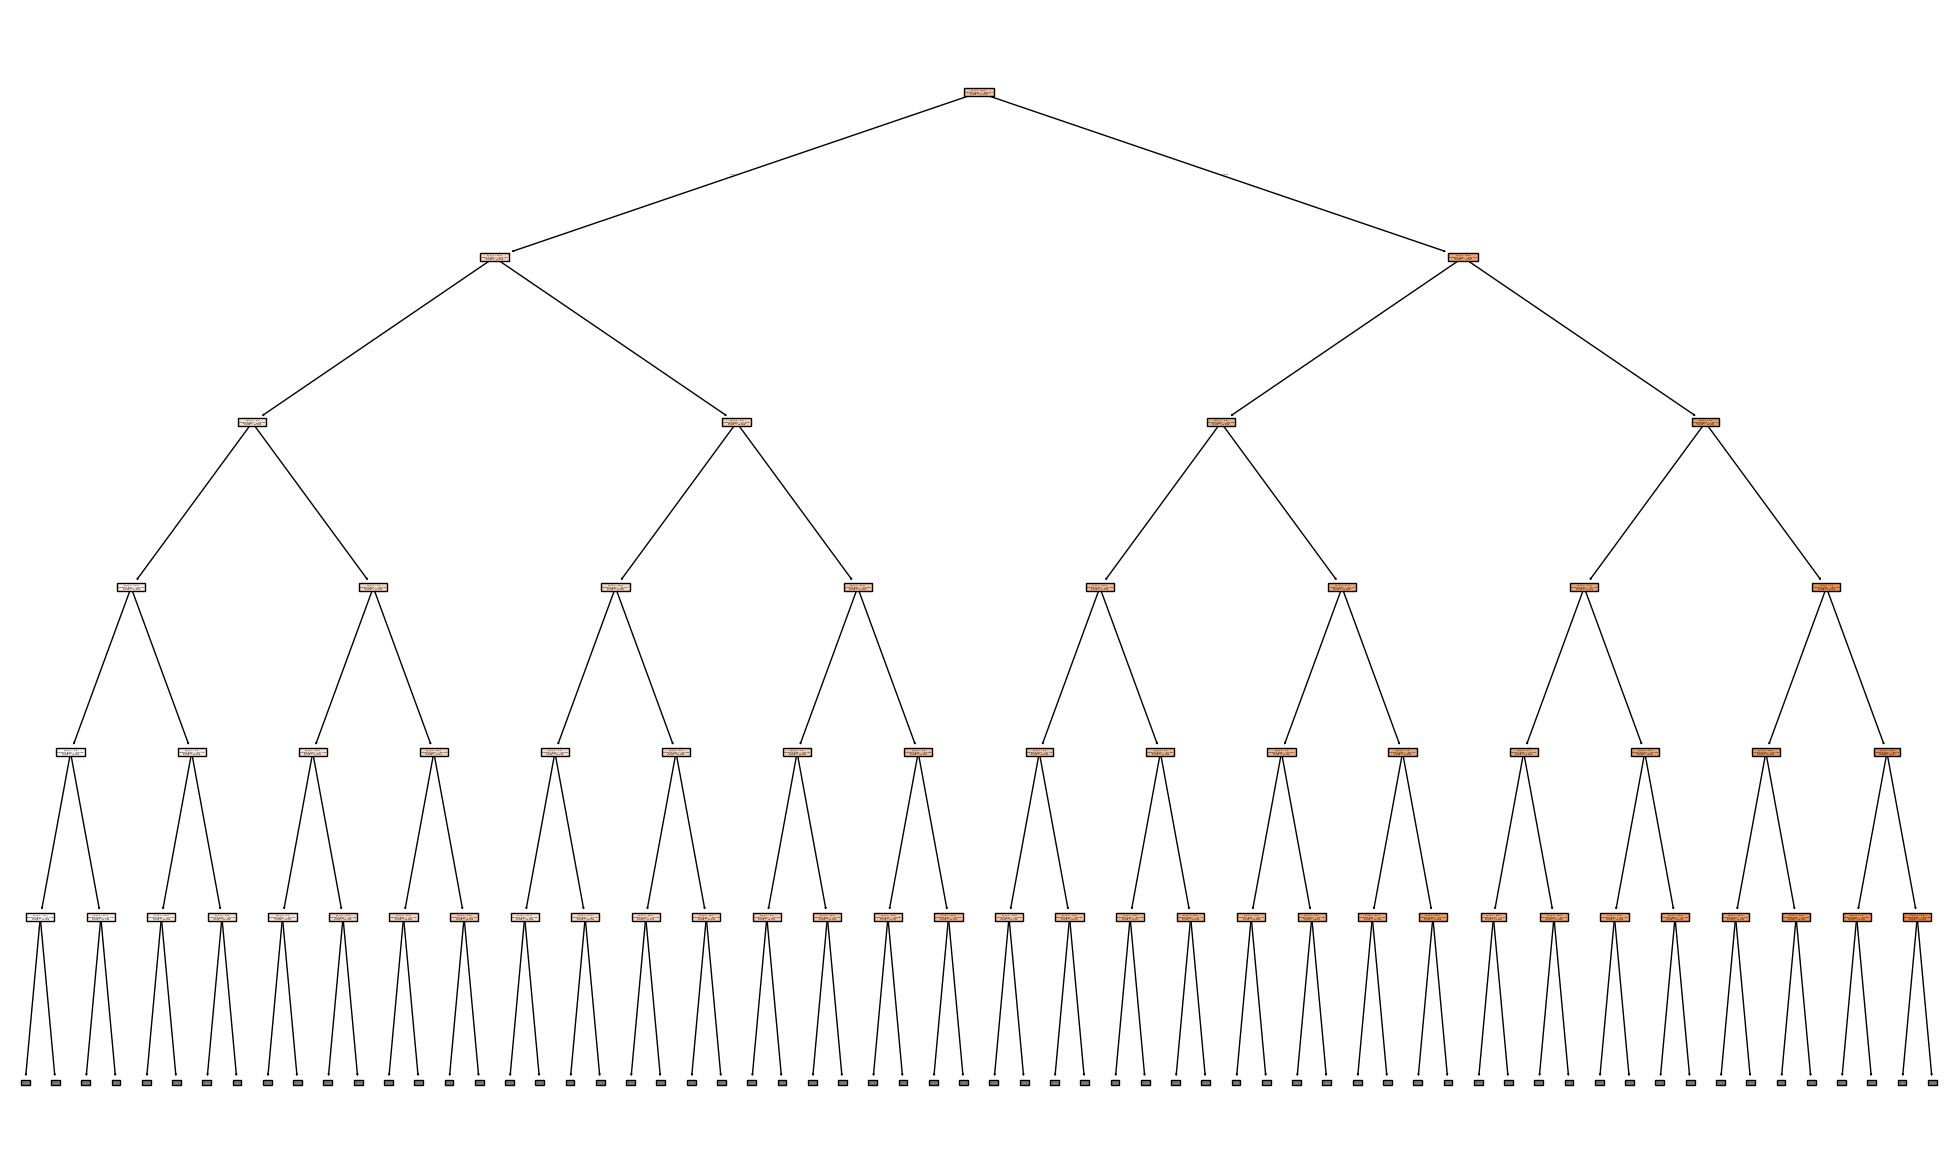

In [64]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(best_model, max_depth=5, filled= True)

In [66]:
dt_regressor.score(x_test,y_test)

0.9823108674948402

In [70]:
print("Train R2:", best_model.score(x_train, y_train))
print("Test R2:", best_model.score(x_test, y_test))

Train R2: 0.9889375706167367
Test R2: 0.9840579839353718


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [73]:
model_2 = DecisionTreeRegressor(max_depth=8, min_samples_split=13, min_samples_leaf=7, random_state=42)

In [74]:
model_2.fit(X_train_scaled, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",13
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",7
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [76]:
print("Train R2:", model_2.score(X_train_scaled, y_train))
print("Test R2:", model_2.score(X_test_scaled, y_test))

Train R2: 0.9860527038010453
Test R2: 0.9823108674948402


In [77]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_regressor, x, y, cv=5, scoring='r2')
print("CV scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())

CV scores: [0.98303721 0.98239659 0.98280717 0.98419721 0.98227856]
Mean CV R2: 0.9829433464327868


In [79]:
dt_regressor.get_depth()

8